In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils

In [2]:
#!pip install dask_ml

In [3]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [5]:

# get paths to attached zarr files of ME frames, and pkl files of meta data
zarr_files = utils.find_files(root_dir = '/root/capsule/data', endswith='zarr')
pkl_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.pkl', return_dir=False)
meta_obj = utils.load_pickle_file(pkl_files[0])

In [6]:
### Use object to compute and plot PCs
from PCAgenerator import PCAgenerator
me_pca = PCAgenerator(zarr_files[0], crop_region=(250, 300,  400, 500)) # testing one file, with a specified crop window

In [7]:

me_pca._apply_pca_to_motion_energy_without_dask()


Loaded frames (221611, 492, 658)
Applying crop to ME frames (250, 300, 400, 500)


In [1]:
#standardized frames
# to do: add example raw frame
fig = me_pca._plot_spatial_masks()

NameError: name 'me_pca' is not defined

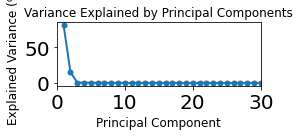

In [ ]:
fig = me_pca.plot_explained_variance()

Found key: 'fps' with value: 60


array([<Axes: title={'center': 'PCA 1 over time (s)'}, ylabel='PCA 1'>,
       <Axes: title={'center': 'PCA 2 over time (s)'}, ylabel='PCA 2'>,
       <Axes: title={'center': 'PCA 3 over time (s)'}, xlabel='Time (s)', ylabel='PCA 3'>],
      dtype=object)

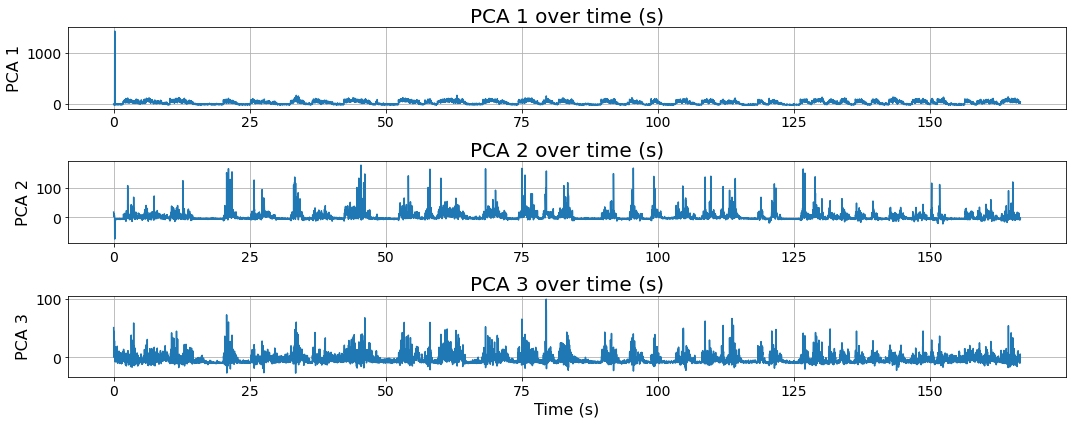

In [ ]:
me_pca.plot_pca_components_traces()

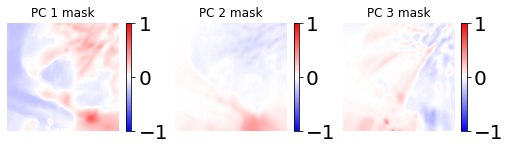

In [ ]:
# not standardized frames
fig = me_pca.plot_spatial_masks()

#### load Zarr file firectly without dask

In [ ]:
import zarr
import dask
import dask.array as da
# me_store = zarr.DirectoryStore(zarr_files[0])
# me_frames = da.from_zarr(me_store, component='data')

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.decomposition import IncrementalPCA
# n_components = 100
# chunk_size = 100

In [ ]:
# zarr_group = zarr.open(zarr_files[0], mode='r') 
# zarr_array = zarr_array['data']
# # Define crop indices
# #crop_region=(250, 300,  500, 450)
# #crop_y_start, crop_x_start, crop_y_end, crop_x_end = crop_region
# z_start, z_end = 0, 100  # Keep the entire first dimension
# y_start, y_end = 150, 350  # Crop from 150 to 350 along the second dimension
# x_start, x_end = 250, 450  # Crop from 100 to 300 along the third dimension

# # Crop the array
# cropped_array = zarr_array[z_start:z_end, y_start:y_end, x_start:x_end]


In [ ]:
# # Initialize Incremental PCA
# n_components = 50  # Number of principal components
# ipca = IncrementalPCA(n_components=n_components)

In [ ]:

# # Iterate over Zarr chunks
# for index in range(np.shape(cropped_array)[0]):
#     # Retrieve the chunk using indices
#     chunk = cropped_array[index]
    
#     # Flatten the chunk into a 2D array
#     flattened_chunk = chunk.reshape(chunk.shape[0], -1)  # Reshape, preserving first dimension
    
#     # Incrementally fit the PCA on the flattened chunk
#     ipca.partial_fit(flattened_chunk)

In [ ]:
# crop_region=(250, 300,  500, 450)
# crop_y_start, crop_x_start, crop_y_end, crop_x_end = crop_region
# me_frames2 = me_frames[:, crop_y_start:crop_y_end, crop_x_start:crop_x_end]
# n_frames, height, width = me_frames2.shape
# new_shape = (n_frames, height * width)
# new_chunks = (100, new_shape[0])
# me_frames3 = me_frames2.reshape(new_shape)
# plt.imshow(me_frames[1000], vmax=np.percentile(me_frames[1000].ravel(), 95))